In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [2]:
dat = pd.read_csv("../archive/merged_csv/matmul_c_2023_02_13__10_02_58.csv")
dat["Total_Power"] = dat["Total_Avg_Power__mWatt"]
# dat[]
# c_25 = []
# c_50 = []
# c_75 = []
# c_max = []

# g_25 = []
# g_50 = []
# g_75 = []
# g_max = []

# for index,row in dat.iterrows():
#     print(row["CPU_percent"][1:3])
    
    
    
# #     c_25.append(row["CPU_percent"][0])
# #     c_50.append(row["CPU_percent"][1])
# #     c_75.append(row["CPU_percent"][2])
# #     c_max.append(row["CPU_percent"][3])
    
# #     g_25.append(row["GPU_percent"][0])
# #     g_50.append(row["GPU_percent"][1])
# #     g_75.append(row["GPU_percent"][2])
# #     g_max.append(row["GPU_percent"][3])

    
# # dat["cpu_25"] = c_25
# # dat["cpu_50"] = c_50
# # dat["cpu_75"] = c_75
# # dat["cpu_max"] = c_max



# # dat["gpu_25"] = g_25
# # dat["gpu_50"] = g_50
# # dat["gpu_75"] = g_75
# # dat["gpu_max"] = g_max


In [3]:
dat.columns

Index(['Unnamed: 0', 'Batch_Size', 'CPU_Avg_Power__mWatt',
       'CPU_Energy__mWattSec', 'CPU_percent__%', 'Cpu_freq',
       'GPU_Avg_Power__mWatt', 'GPU_Energy__mWattSec', 'GPU_percent__%',
       'Gpu_freq', 'Iteration', 'Model', 'Num_CPU', 'Test_Image_Name',
       'Time_Taken__Sec', 'Total_Avg_Power__mWatt', 'Total_Energy__mWattSec',
       'Total_Power'],
      dtype='object')

In [4]:
bat = dat.Batch_Size.unique()
bat = bat[~np.isnan(bat)]
bat = np.sort(bat)
bat

array([2048, 4096])

/home/gary/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/gary/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/gary/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/gary/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/gary/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/gary/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/gary/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfu

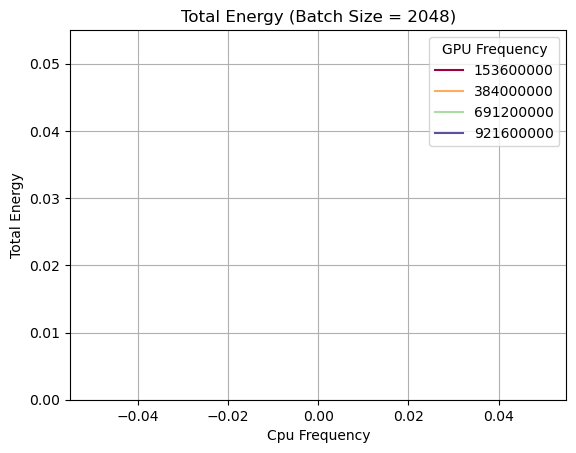

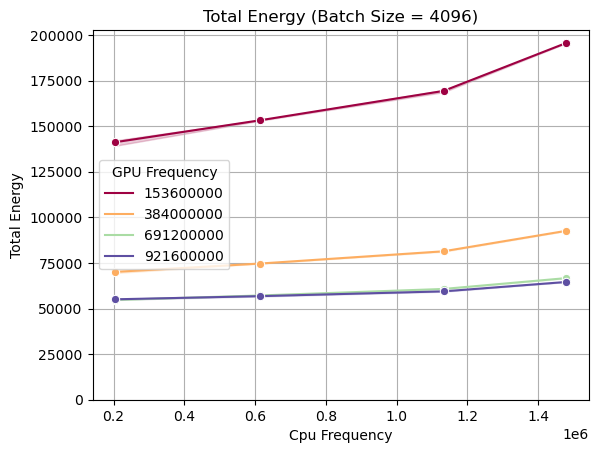

In [5]:
for b in bat:
    tmp = dat[dat.Batch_Size == b]
    cpuf = dat.Cpu_freq.unique()
    cpuf = cpuf[~np.isnan(cpuf)]
    gpuf = dat.Gpu_freq.unique()
    gpuf = gpuf[~np.isnan(gpuf)]
    
    sns.lineplot(data = tmp, x = "Cpu_freq", 
                 y = "Total_Energy__mWattSec", 
                 hue = "Gpu_freq", 
                 marker = "o", 
                 dashes = False, 
                 palette = "Spectral").set(ylabel = 'Total Energy', xlabel = 'Cpu Frequency', title = "Total Energy (Batch Size = " + str(b) + ")")
    plt.grid()
    plt.legend(title='GPU Frequency')
    plt.ylim(ymin=0)
    plt.show()
            
    

/home/gary/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/gary/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/gary/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/gary/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/gary/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/gary/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/home/gary/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfu

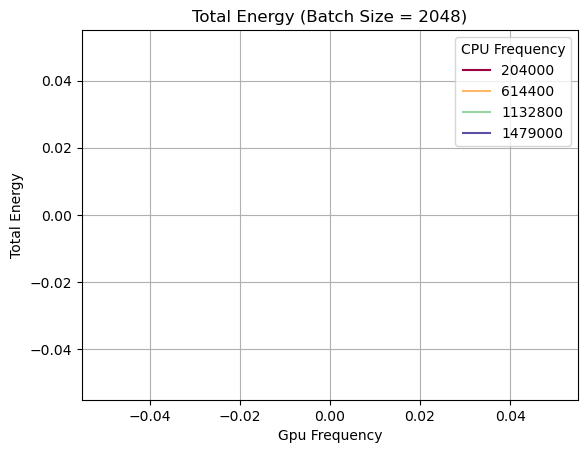

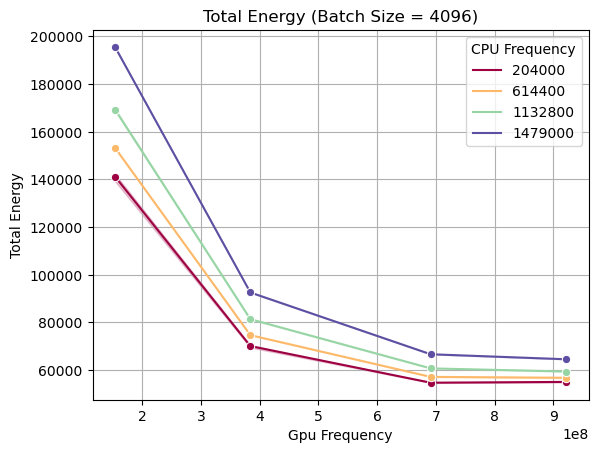

In [6]:
for b in bat:
    tmp = dat[dat.Batch_Size == b]
    cpuf = dat.Cpu_freq.unique()
    cpuf = cpuf[~np.isnan(cpuf)]
    gpuf = dat.Gpu_freq.unique()
    gpuf = gpuf[~np.isnan(gpuf)]
    
    sns.lineplot(data = tmp, x = "Gpu_freq", 
                 y = "Total_Energy__mWattSec", 
                 hue = "Cpu_freq", 
                 marker = "o", 
                 dashes = False, 
                 palette = "Spectral").set(ylabel = 'Total Energy', xlabel = 'Gpu Frequency', title = "Total Energy (Batch Size = " + str(b) + ")")
    plt.grid()
    plt.legend(title='CPU Frequency')
#     plt.ylim(ymin=0)
    plt.show()
            

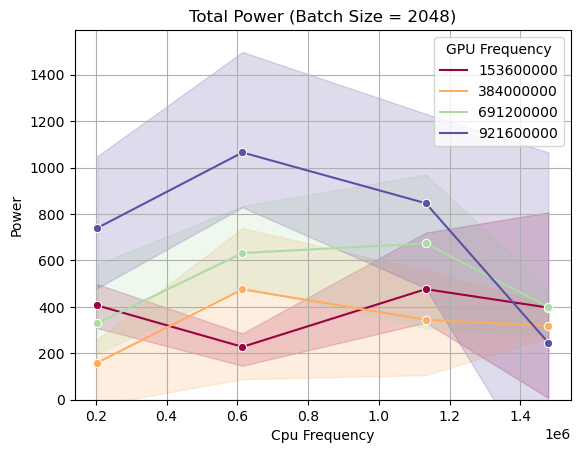

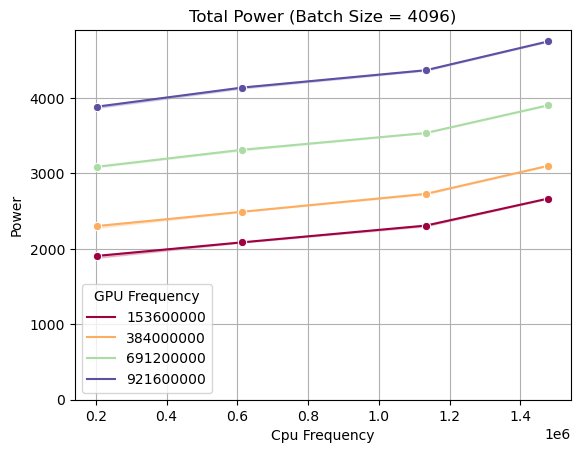

In [7]:
for b in bat:
    tmp = dat[dat.Batch_Size == b]
    cpuf = dat.Cpu_freq.unique()
    cpuf = cpuf[~np.isnan(cpuf)]
    gpuf = dat.Gpu_freq.unique()
    gpuf = gpuf[~np.isnan(gpuf)]
    
    sns.lineplot(data = tmp, x = "Cpu_freq", 
                 y = "Total_Power", 
                 hue = "Gpu_freq", 
                 marker = "o", 
                 dashes = False, 
                 palette = "Spectral").set(ylabel = 'Power', xlabel = 'Cpu Frequency', title = "Total Power (Batch Size = " + str(b) + ")")
    plt.grid()
    plt.legend(title='GPU Frequency')
    plt.ylim(ymin=0)
    plt.show()
            

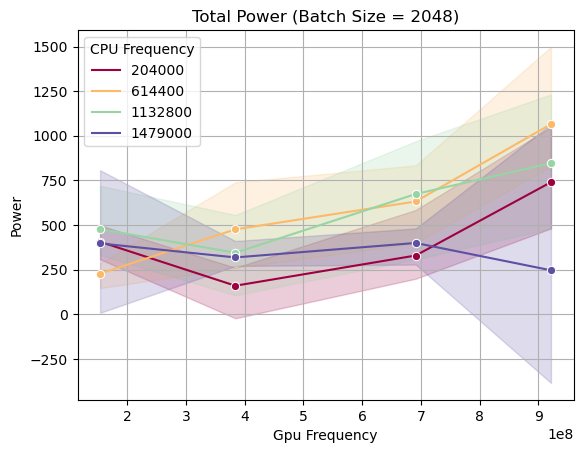

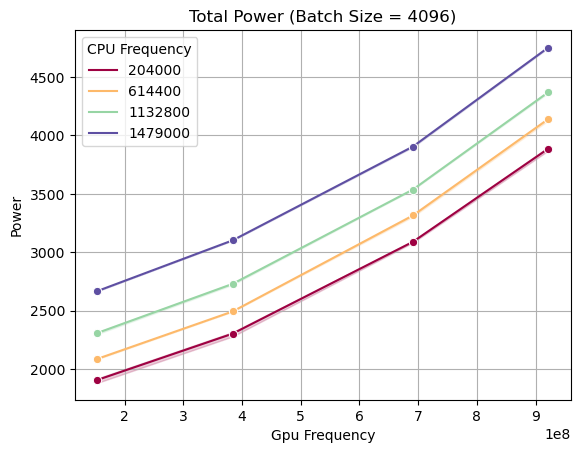

In [8]:
for b in bat:
    tmp = dat[dat.Batch_Size == b]
    cpuf = dat.Cpu_freq.unique()
    cpuf = cpuf[~np.isnan(cpuf)]
    gpuf = dat.Gpu_freq.unique()
    gpuf = gpuf[~np.isnan(gpuf)]
    
    sns.lineplot(data = tmp, x = "Gpu_freq", 
                 y = "Total_Power", 
                 hue = "Cpu_freq", 
                 marker = "o", 
                 dashes = False, 
                 palette = "Spectral").set(ylabel = 'Power', xlabel = 'Gpu Frequency', title = "Total Power (Batch Size = " + str(b) + ")")
    plt.grid()
    plt.legend(title='CPU Frequency')
#     plt.ylim(ymin=0)
    plt.show()
            

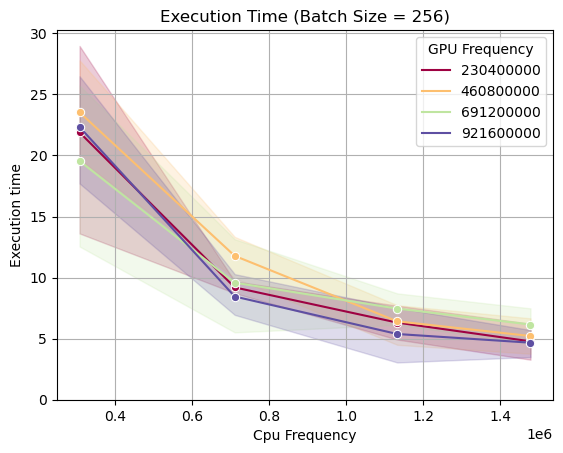

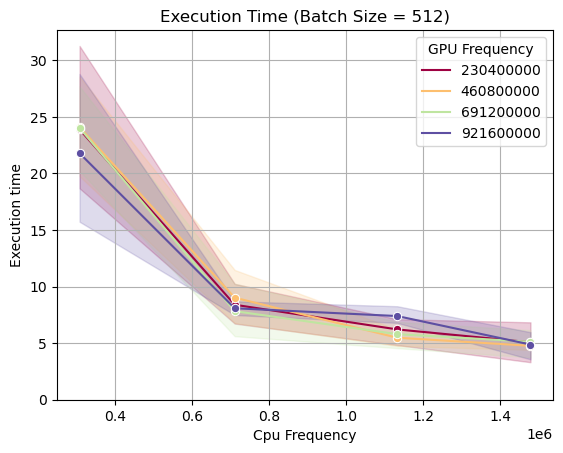

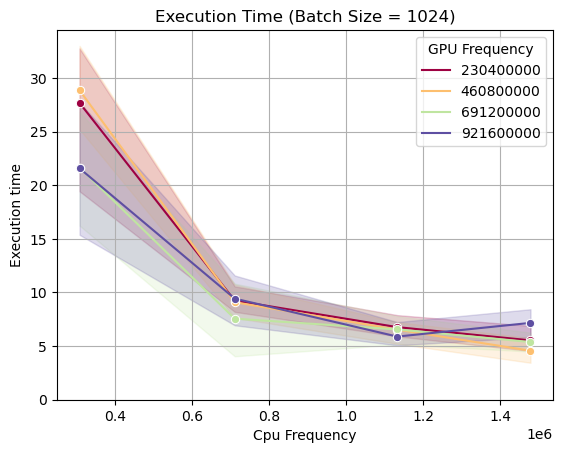

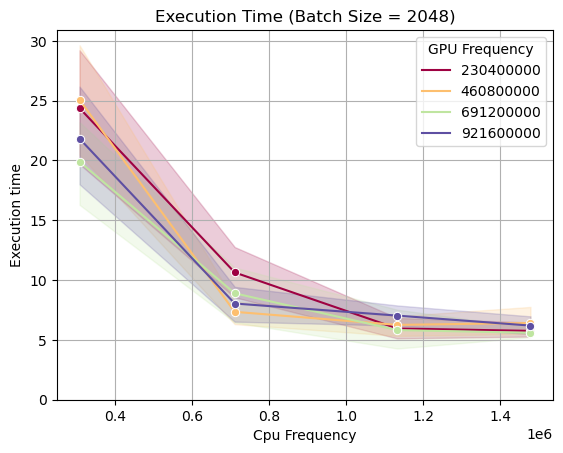

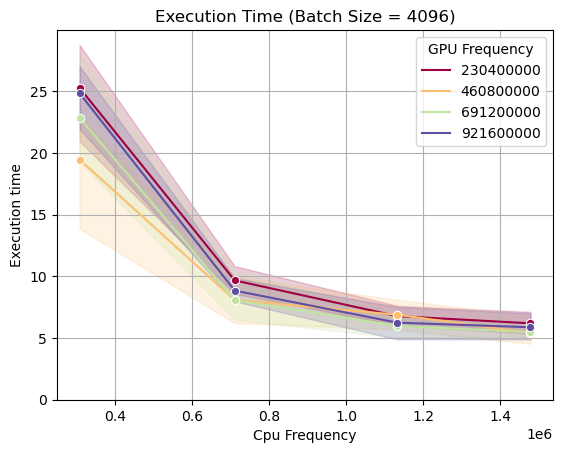

In [12]:
for b in bat:
    tmp = dat[dat.Batch_Size == b]
    cpuf = dat.Cpu_freq.unique()
    cpuf = cpuf[~np.isnan(cpuf)]
    gpuf = dat.Gpu_freq.unique()
    gpuf = gpuf[~np.isnan(gpuf)]
    
    sns.lineplot(data = tmp, x = "Cpu_freq", 
                 y = "Time_Taken__Sec", 
                 hue = "Gpu_freq", 
                 marker = "o", 
                 dashes = False, 
                 palette = "Spectral").set(ylabel = 'Execution time', xlabel = 'Cpu Frequency', title = "Execution Time (Batch Size = " + str(b) + ")")
    plt.grid()
    plt.legend(title='GPU Frequency')
    plt.ylim(ymin=0)
    plt.show()

In [ ]:
for b in bat:
    tmp = dat[dat.Batch_Size == b]
    cpuf = dat.Cpu_freq.unique()
    cpuf = cpuf[~np.isnan(cpuf)]
    gpuf = dat.Gpu_freq.unique()
    gpuf = gpuf[~np.isnan(gpuf)]
    
    sns.lineplot(data = tmp, x = "Gpu_freq", 
                 y = "Time_Taken__Sec", 
                 hue = "Cpu_freq", 
                 marker = "o", 
                 dashes = False, 
                 palette = "Spectral").set(ylabel = 'Execution time', xlabel = 'Gpu Frequency', title = "Execution Time (Batch Size = " + str(b) + ")")
    plt.grid()
    plt.legend(title='CPU Frequency')
    plt.ylim(ymin=0)
    plt.show()

In [ ]:
for b in bat:
    tmp = dat[dat.Batch_Size == b]
    cpuf = dat.Cpu_freq.unique()
    cpuf = cpuf[~np.isnan(cpuf)]
    gpuf = dat.Gpu_freq.unique()
    gpuf = gpuf[~np.isnan(gpuf)]
    
    sns.lineplot(data = tmp, x = "Cpu_freq", 
                 y = "CPU_Energy__mWattSec", 
                 hue = "Gpu_freq", 
                 marker = "o", 
                 dashes = False, 
                 palette = "Spectral").set(ylabel = 'CPU Energy', xlabel = 'Cpu Frequency', title = "CPU Energy(Batch Size = " + str(b) + ")")
    plt.grid()
    plt.legend(title='GPU Frequency')
    plt.ylim(ymin=0)
    plt.show()
            

In [ ]:
for b in bat:
    tmp = dat[dat.Batch_Size == b]
    cpuf = dat.Cpu_freq.unique()
    cpuf = cpuf[~np.isnan(cpuf)]
    gpuf = dat.Gpu_freq.unique()
    gpuf = gpuf[~np.isnan(gpuf)]
    
    sns.lineplot(data = tmp, x = "Gpu_freq", 
                 y = "CPU_Energy__mWattSec", 
                 hue = "Cpu_freq", 
                 marker = "o", 
                 dashes = False, 
                 palette = "Spectral").set(ylabel = 'CPU Energy', xlabel = 'Gpu Frequency', title = "CPU Energy(Batch Size = " + str(b) + ")")
    plt.grid()
    plt.legend(title='CPU Frequency')
    plt.ylim(ymin=0)
    plt.show()
            

In [ ]:
for b in bat:
    tmp = dat[dat.Batch_Size == b]
    cpuf = dat.Cpu_freq.unique()
    cpuf = cpuf[~np.isnan(cpuf)]
    gpuf = dat.Gpu_freq.unique()
    gpuf = gpuf[~np.isnan(gpuf)]
    
    sns.lineplot(data = tmp, x = "Gpu_freq", 
                 y = "GPU_Avg_Power__mWatt", 
                 hue = "Cpu_freq", 
                 marker = "o", 
                 dashes = False, 
                 palette = "Spectral").set(ylabel = 'GPU Power', xlabel = 'Gpu Frequency', title = "GPU Power(Batch Size = " + str(b) + ")")
    plt.grid()
    plt.legend(title='CPU Frequency')
    plt.ylim(ymin=0)
    plt.show()
            

In [ ]:
for b in bat:
    tmp = dat[dat.Batch_Size == b]
    cpuf = dat.Cpu_freq.unique()
    cpuf = cpuf[~np.isnan(cpuf)]
    gpuf = dat.Gpu_freq.unique()
    gpuf = gpuf[~np.isnan(gpuf)]
    
    sns.lineplot(data = tmp, x = "Gpu_freq", 
                 y = "GPU_Energy__mWattSec", 
                 hue = "Cpu_freq", 
                 marker = "o", 
                 dashes = False, 
                 palette = "Spectral").set(ylabel = 'GPU Energy', xlabel = 'Gpu Frequency', title = "GPU Energy(Batch Size = " + str(b) + ")")
    plt.grid()
    plt.legend(title='CPU Frequency')
    plt.ylim(ymin=0)
    plt.show()
            

In [ ]:
cfreq = dat.Cpu_freq.unique()
cfreq = cfreq[~np.isnan(cfreq)]
cfreq = np.sort(cfreq)
cfreq

In [ ]:
for c in cfreq:
    tmp = dat[dat.Cpu_freq == c]

    
    sns.lineplot(data = tmp, x = "Batch_Size", 
                 y = "Total_Energy__mWattSec", 
                 hue = "Gpu_freq", 
                 marker = "o", 
                 dashes = False, 
                 palette = "Spectral").set(ylabel = 'Total Energy', xlabel = 'Batch_Size', title = "Total Energy (Cpu Freq = " + str(c) + ")")
    plt.grid()
    plt.legend(title='GPU Frequency')
    plt.ylim(ymin=0)
    plt.show()

In [ ]:
for c in cfreq:
    tmp = dat[dat.Cpu_freq == c]

    
    sns.lineplot(data = tmp, x = "Batch_Size", 
                 y = "Total_Power", 
                 hue = "Gpu_freq", 
                 marker = "o", 
                 dashes = False, 
                 palette = "Spectral").set(ylabel = 'Total Power', xlabel = 'Batch_Size', title = "Total Power (Cpu Freq = " + str(c) + ")")
    plt.grid()
    plt.legend(title='GPU Frequency')
    plt.ylim(ymin=0)
    plt.show()

In [ ]:
for c in cfreq:
    tmp = dat[dat.Cpu_freq == c]

    
    sns.lineplot(data = tmp, x = "Batch_Size", 
                 y = "Time_Taken__Sec", 
                 hue = "Gpu_freq", 
                 marker = "o", 
                 dashes = False, 
                 palette = "Spectral").set(ylabel = 'Execution Time', xlabel = 'Batch_Size', title = "Time taken (Cpu Freq = " + str(c) + ")")
    plt.grid()
    plt.legend(title='GPU Frequency')
    plt.ylim(ymin=0)
    plt.show()

In [ ]:
for c in cfreq:
    tmp = dat[dat.Cpu_freq == c]

    
    sns.lineplot(data = tmp, x = "Batch_Size", 
                 y = "CPU_Energy__mWattSec", 
                 hue = "Gpu_freq", 
                 marker = "o", 
                 dashes = False, 
                 palette = "Spectral").set(ylabel = 'CPU_Energy__mWattSec', xlabel = 'Batch_Size', title = "CPU Energy (Cpu Freq = " + str(c) + ")")
    plt.grid()
    plt.legend(title='GPU Frequency')
    plt.ylim(ymin=0)
    plt.show()

In [ ]:
for c in cfreq:
    tmp = dat[dat.Cpu_freq == c]

    
    sns.lineplot(data = tmp, x = "Batch_Size", 
                 y = "GPU_Energy__mWattSec", 
                 hue = "Gpu_freq", 
                 marker = "o", 
                 dashes = False, 
                 palette = "Spectral").set(ylabel = 'CPU_Energy__mWattSec', xlabel = 'Batch_Size', title = "GPU Energy (Cpu Freq = " + str(c) + ")")
    plt.grid()
    plt.legend(title='GPU Frequency')
    plt.ylim(ymin=0)
    plt.show()

In [ ]:
gfreq = dat.Gpu_freq.unique()
gfreq = gfreq[~np.isnan(gfreq)]
gfreq = np.sort(gfreq)
gfreq

In [ ]:
for g in gfreq:
    tmp = dat[dat.Gpu_freq == g]

    
    sns.lineplot(data = tmp, x = "Batch_Size", 
                 y = "Total_Energy__mWattSec", 
                 hue = "Cpu_freq", 
                 marker = "o", 
                 dashes = False, 
                 palette = "Spectral").set(ylabel = 'Total Energy', xlabel = 'Batch_Size', title = "GPU Energy (Gpu Freq = " + str(g) + ")")
    plt.grid()
    plt.legend(title='CPU Frequency')
    plt.ylim(ymin=0)
    plt.show()

In [ ]:
for g in gfreq:
    tmp = dat[dat.Gpu_freq == g]

    
    sns.lineplot(data = tmp, x = "Batch_Size", 
                 y = "Total_Power", 
                 hue = "Cpu_freq", 
                 marker = "o", 
                 dashes = False, 
                 palette = "Spectral").set(ylabel = 'Total Power', xlabel = 'Batch_Size', title = "Total Power (Gpu Freq = " + str(g) + ")")
    plt.grid()
    plt.legend(title='CPU Frequency')
    plt.ylim(ymin=0)
    plt.show()

In [ ]:
for g in gfreq:
    tmp = dat[dat.Gpu_freq == g]

    
    sns.lineplot(data = tmp, x = "Batch_Size", 
                 y = "Time_Taken__Sec", 
                 hue = "Cpu_freq", 
                 marker = "o", 
                 dashes = False, 
                 palette = "Spectral").set(ylabel = 'Execution Time', xlabel = 'Batch_Size', title = "Time taken (Gpu Freq = " + str(g) + ")")
    plt.grid()
    plt.legend(title='CPU Frequency')
    plt.show()

In [ ]:
for g in gfreq:
    tmp = dat[dat.Gpu_freq == g]

    
    sns.lineplot(data = tmp, x = "Batch_Size", 
                 y = "CPU_Energy__mWattSec", 
                 hue = "Cpu_freq", 
                 marker = "o", 
                 dashes = False, 
                 palette = "Spectral").set(ylabel = 'CPU_Energy__mWattSec', xlabel = 'Batch_Size', title = "CPU Energy (Gpu Freq = " + str(c) + ")")
    plt.grid()
    plt.legend(title='CPU Frequency')
    plt.show()

In [ ]:
for g in gfreq:
    tmp = dat[dat.Gpu_freq == g]

    
    sns.lineplot(data = tmp, x = "Batch_Size", 
                 y = "GPU_Energy__mWattSec", 
                 hue = "Cpu_freq", 
                 marker = "o", 
                 dashes = False, 
                 palette = "Spectral").set(ylabel = 'GPU_Energy__mWattSec', xlabel = 'Batch_Size', title = "GPU Energy (Gpu Freq = " + str(c) + ")")
    plt.grid()
    plt.legend(title='CPU Frequency')
    plt.show()